# 1. RECOMENDADORES Y AGRUPAMIENTOS

> Un recomendador es un sistema que recoge y analiza las preferencias de los usuarios, generalmente en algún sitio web (comercios, redes sociales, sitios de emisión o selección de música o películas, etc.). La premisa básica de los recomendadores es que usuarios con actividad o gustos similares continuarán compartiendo preferencias en el futuro. Al recomendar a un usuario productos o actividades que otros usuarios con gustos similares han elegido previamente el grado de acierto acostumbra a ser más elevado que si las recomendaciones se basan en tendencias generales, sin personalizar.

- La tarea de encontrar a los usuarios más afines y utilizar esta información para predecir sus preferencias puede inscribirse en una tarea más general que recibe el nombre de agrupamiento (clustering), y que consiste en encontrar la subdivisión óptima de un conjunto de datos, de forma que los datos similares pertenezcan al mismo grupo.

## 1.1 MÉTRICAS Y MEDIDAS DE SIMILITUD

> Una métrica es una función que calcula la distancia entre dos elementos y que por tanto se utiliza para medir cuán diferentes son. Existen varias formas de medir la distancia entre dos elementos, y elegir la métrica adecuada para cada problema es un paso crucial para obtener buenos resultados en cualquier aplicación de minería de datos.

- **Distancia euclidiana**
- **Correlación de Pearson**

Función de similitud $s$ dada una función de distancia $d$ (*no incurre en divisiones por cero si la distancia es cero*)

$$s(P,Q) = \frac{1}{1 + d(P,Q)}$$

### 1.1.1 Ejemplo de aplicación

> En un sitio web de visualización de películas a la carta se recoge la valoración de cada usuario sobre las películas que va viendo, con el objetivo de poder proponer a los usuarios las películas que más se adapten a sus gustos. Tras ver una película, un usuario ha de dar una valoración entre 1 y 5, donde las valoraciones más bajas corresponden a películas que han disgustado al usuario, y las más alta a las que le han gustado más. Se desea descubrir similitudes entre usuarios de manera que a cada usuario se le propongan las películas que más han gustado a los usuarios con gustos más parecidos al suyo.

Dataset utilizado: [https://grouplens.org/datasets/movielens/](https://grouplens.org/datasets/movielens/)

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
len(ratings)

100836

In [4]:
from collections import defaultdict

In [5]:
ratings_data = defaultdict(dict)

for userRate in ratings.iloc:
    ratings_data[userRate['userId']][userRate['movieId']] = userRate['rating'] 

In [6]:
len(ratings_data.items())

610

### 1.1.2 Distancia euclidiana

> La distancia euclidiana de dos puntos $P = (p_1,p_2,...,p_n)$ y $Q = (q_1,q_2,...,q_n)$ en el espacio n-dimensional $\mathbb{R}^n$ viene dada por la fórmula:

$$ d(P,Q) = \sqrt{\sum_{i=1}^{n} {(p_i - q_i)}^2 } $$

- La distancia euclídea no es más que la generalización a $n$ dimensiones del teorema de Pitágoras. Si las distancias en sí no son importantes, sino sólo su comparación, a menudo se utiliza la distancia euclídea cuadrada, es decir, sin la raíz cuadrada, pues la comparación entre distancias euclídeas cuadradas da los mismos resultados que entre las distancias euclídeas y puede resultar mucho más rápida de calcular, ya que la raíz cuadrada es una operación computacionalmente costosa.

In [7]:
from math import sqrt

In [8]:
def distEuclideaSquared(user1, user2):
    return sum([pow(user1[movieId] - user2[movieId], 2) for movieId in user1 if movieId in user2])

In [9]:
def distEuclidea(user1, user2):
    return sqrt(distEuclideaSquared(user1, user2))

In [10]:
def similEuclidea(user1, user2):
    return 1/(1+distEuclideaSquared(user1, user2))

In [11]:
distEuclideaSquared(ratings_data[1], ratings_data[2])

2.0

In [12]:
distEuclidea(ratings_data[1], ratings_data[2])

1.4142135623730951

In [13]:
similEuclidea(ratings_data[1], ratings_data[2])

0.3333333333333333

**Matriz de similitud para los primeros 4 usuarios**

In [14]:
import numpy as np

In [15]:
n_users = 4

result = np.zeros((n_users, n_users))

for user1 in range(1, n_users+1):
    for user2 in range(1, n_users+1):
        result[user1-1, user2-1] = similEuclidea(ratings_data[user1], ratings_data[user2])
        
simil_matrix = pd.DataFrame(result, index=range(1, n_users+1), columns=range(1, n_users+1))

simil_matrix

,1,2,3,4
1,1.000000,0.333333,0.014652,0.008000
2,0.333333,1.000000,1.000000,0.075472
3,0.014652,1.000000,1.000000,0.047059
4,0.008000,0.075472,0.047059,1.000000


In [16]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

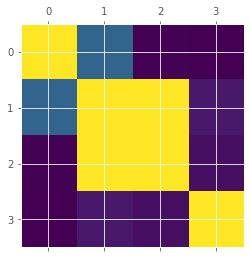

In [17]:
plt.matshow(simil_matrix)
plt.show()

Supongamos que el usuario 4 desea que se le recomiende alguna película; el sistema, de momento, puede sugerirle que vea las películas que han gustado al usuario 2 (y no ha visto el 4), ya que es el usuario con mayor similitud.

In [18]:
user4_movies = list(ratings_data[4].keys())
user2_movies = [item for item in ratings_data[2].items() if item[0] not in user4_movies]

user2_movies.sort(key=lambda x: x[1], reverse=True)

user2_movies[:10]

[(60756.0, 5.0),
 (80906.0, 5.0),
 (89774.0, 5.0),
 (106782.0, 5.0),
 (122882.0, 5.0),
 (131724.0, 5.0),
 (58559.0, 4.5),
 (68157.0, 4.5),
 (80489.0, 4.5),
 (333.0, 4.0)]

Una limitación de la similitud (y la distancia) euclídea es que es muy sensible a la escala: si un usuario tiende a puntuar las películas que le gustan con un 4 y otro con un 5, habrá una cierta distancia entre ellos, en especial si el número de valoraciones es alto, aunque en el fondo ambos usuarios comparten gustos a pesar de utilizar las puntuaciones de formas diferentes.

Además, a mayor número de dimensiones (valoraciones, en este caso), la distancia euclídea tiende a ser mayor, lo que puede distorsionar los resultados.
Por ejemplo, si dos usuarios comparten 2 valoraciones y hay una diferencia de 1 entre cada una de ellas, su distancia será $d = \sqrt{1^2 + 1^2} = 1.41$; sin embargo, si comparten 5 valoraciones con una diferencia de 1 entre ellas, su distancia será $d = \sqrt{1^2 + 1^2 + 1^2 + 1^2 + 1^2} = 2,24$; una distancia bastante mayor para unas valoraciones en apariencia similares. Cuantas más valoraciones compartan dos usuarios (aunque no sean muy diferentes), más alejados estarán, lo que parece contrario a la lógica.

### 1.1.3 Correlación de Pearson

El coeficiente de correlación de Pearson es una medida de similitud entre dos variables que resuelve los problemas de la similitud euclídea. Se trata de una medida de cómo las dos variables, una frente a otra, se organizan en torno a una línea recta (línea de mejor ajuste).

Cuanto más similares son las valoraciones de dos usuarios, más se parecerá su recta a la recta y = x, ya que las valoraciones serán de la forma (1,1), (3,3), (4,4), etc.

> Diagrama de dispersión (scatter plot) de las valoraciones de dos usuarios: se representa la valoración de cada película en común tomando el eje x como la valoración de un usuario, y el eje y como la valoración del otro usuario. Los números en el diagrama corresponden a los identificadores de las películas comunes.

In [19]:
user1_rates = ratings_data[10]
user2_rates = ratings_data[15]

common_movies = [x for x in user1_rates.keys() if x in user2_rates.keys()]
common_points = [(user1_rates[m], user2_rates[m]) for m in common_movies]

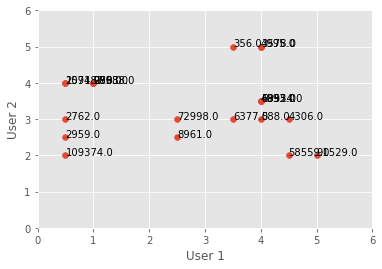

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter([p[0] for p in common_points], [p[1] for p in common_points])

for i, m in enumerate(common_movies):
    ax.annotate(m, common_points[i])

plt.xlabel("User 1")
plt.ylabel("User 2")

plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

El coeficiente de correlación de Pearson está relacionado con la pendiente de la recta que mejor se ajusta a estos puntos, y puede tomar un valor en el rango $[–1,1]$. Si su valor es 1 indica que las dos variables están perfectamente relacionadas; si es 0, no hay relación lineal entre ellas; si es negativo es que existe una correlación negativa, en este caso que las valoraciones de un usuario son opuestas a las del otro.

> El coeficiente de correlación de Pearson sólo mide relaciones lineales; aunque valga 0, puede haber relaciones no lineales entre las dos variables.

El cálculo del coeficiente de correlación de Pearson sobre dos muestras de datos alineados (valoraciones de usuarios, en nuestro caso) $x_i$ e $y_i$ viene dado por la fórmula:

$$ r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $$

In [23]:
import numpy as np

In [24]:
user1_rates_values = [user1_rates[m] for m in common_movies]
user2_rates_values = [user2_rates[m] for m in common_movies]

In [25]:
r_matrix = np.corrcoef(user1_rates_values, user2_rates_values)

r_matrix

array([[ 1.        , -0.03051468],
       [-0.03051468,  1.        ]])

[]

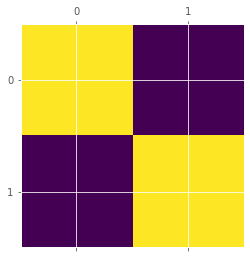

In [27]:
plt.matshow(r_matrix)
plt.plot()

* Función para obtener el coeficiente de correlación de Pearson de dos usuarios (Cada usuario tiene un diccionario <idMovie, valoración>), lo que se calcula es el coeficiente de correlación entre las valoraciones que se han realizados a las películas que tienen en común.

In [29]:
def coefPearson(dic1, dic2):
    # Obtener los elementos comunes a los dos diccionarios
    common = [x for x in dic1 if x in dic2]
    n = float(len(common))
    
    # Si no hay elementos comunes, se devuelve cero; si no
    # se calcula el coeficiente
    if n == 0:
        return 0
    
    # Cálculo de las medias de cada diccionario
    mean1 = sum([dic1[x] for x in common])/n
    mean2 = sum([dic2[x] for x in common])/n
    
    # Cálculo del numerador y del denominador
    num = sum([(dic1[x] - mean1)*(dic2[x] - mean2) for x in common])
    
    den1 = sqrt(sum([pow((dic1[x] - mean1),2) for x in common]))
    den2 = sqrt(sum([pow((dic2[x] - mean2),2) for x in common]))
    
    den = den1*den2
    
    # Calculo del coeficiente si es posible, o devuelve 0
    if den == 0:
        return 0
    
    return num/den

In [30]:
coefPearson(user1_rates, user2_rates)

-0.030514676386652333

El coeficiente de correlación de Pearson resulta útil como medida de similitud porque es independiente de los desplazamientos y escalas de los valores estudiados; para conseguir estas propiedades utilizando la similitud euclídea sería necesario normalizar los datos previamenente a su análisis. Uno de sus principales inconvenientes en su uso en filtrado colaborativo es que requiere que haya al menos dos valores comunes para poder dar un resultado significativo; eso limita su aplicación en aquellos casos en que se desea sugerir productos similares a un cliente que ha hecho una única elección.

## Conclusiones

Las principales limitaciones de los procedimientos explicados en este notebook son dos: primera, que no permiten sugerir productos directamente, sino
sólo usuarios afines. La segunda limitación consiste en que es necesario almacenar en memoria todas las valoraciones de los usuarios y recalcularlas todas cada vez que se incorpora una nueva valoración o usuario, lo que puede suponer un coste computacional alto en aplicaciones grandes; visto de otra manera, no se genera ninguna abstracción o modelo de los datos que permita trabajar con una versión reducida de los datos.